In [1]:

import random
import time
import math
import numpy as np

import torch


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# import seaborn as sns
# sns.set() Problems with attention

## Static encodings

One of the problems of using another embedding layer to encode the positional embeddings is that you cannot expand
the maximum length supported by the model at training time.

This happens because positions *1,2,3...* are encoded as the vocabulary of the embedding layer. Therefore, if we
expand our vocabulary, we need to retrain our model.

Luckily, there is a simple solution to this problem... Encoding positions with a static function. Here, I'll use the
function presented in the paper [Attention Is All You Need](https://arxiv.org/abs/1706.03762) which mixes sines and
cosines.

In [2]:
def positional_encodings(model_d, max_len):
    # Compute the positional encodings once in log space.
    pe = torch.zeros(max_len, model_d)
    position = torch.arange(0, max_len).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, model_d, 2) * -(math.log(10000.0) / model_d))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    return pe.cpu()

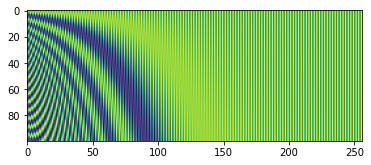

In [3]:
%matplotlib inline

pos_enc = positional_encodings(model_d=256, max_len=100)
plt.imshow(pos_enc)

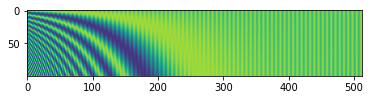

In [4]:
%matplotlib inline

pos_enc = positional_encodings(model_d=512, max_len=100)
plt.imshow(pos_enc)

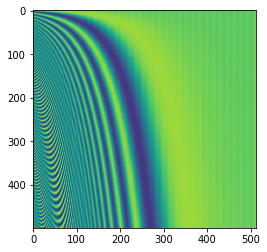

In [5]:
%matplotlib inline

pos_enc = positional_encodings(model_d=512, max_len=500)
plt.imshow(pos_enc)


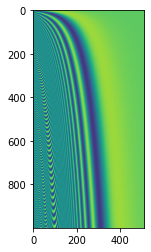

In [6]:
%matplotlib inline

pos_enc = positional_encodings(model_d=512, max_len=1000)
plt.imshow(pos_enc)

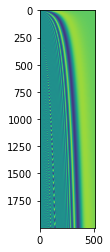

In [7]:
%matplotlib inline

pos_enc = positional_encodings(model_d=512, max_len=2000)
plt.imshow(pos_enc)

